In [148]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import math

import seaborn as sns

import plotly.express as px

%matplotlib inline

In [149]:
patient_data = pd.read_csv('heart.csv')
patient_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Checking for null values

In [150]:
patient_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

No null values in the dataset

In [151]:
patient_data.describe() 

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [152]:
patient_data.shape

(319795, 18)

In [153]:
patient_data.size

5756310

## Data Analysis

In [154]:
patient_data #.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [155]:
# sns.countplot(x = 'Smoking', data = patient_data)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot



smoking = patient_data.Smoking.value_counts()
alcohol = patient_data.AlcoholDrinking.value_counts()
stroke = patient_data.Stroke.value_counts()
physicalActivity = patient_data.PhysicalActivity.value_counts()

fig = make_subplots(rows = 2, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
             values = smoking.values,
             labels = smoking.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people smoking'), row = 1, col = 1)

fig.add_trace(go.Pie(
             values = alcohol.values,
             labels = alcohol.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people consuming Alcohol'), row = 1, col = 2)

fig.add_trace(go.Pie(
             values = stroke.values,
             labels = stroke.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people had a Stroke'), row = 2, col = 1)

fig.add_trace(go.Pie(
             values = physicalActivity.values,
             labels = physicalActivity.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people with Physical Activity'), row = 2, col = 2)



fig.update_traces(titleposition = 'bottom center',textposition = 'inside', 
                  textinfo = 'percent+label',marker_colors=px.colors.qualitative.Prism, 
                  marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(margin=dict(t=5, b=5, l=5, r=5))
fig.show()

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

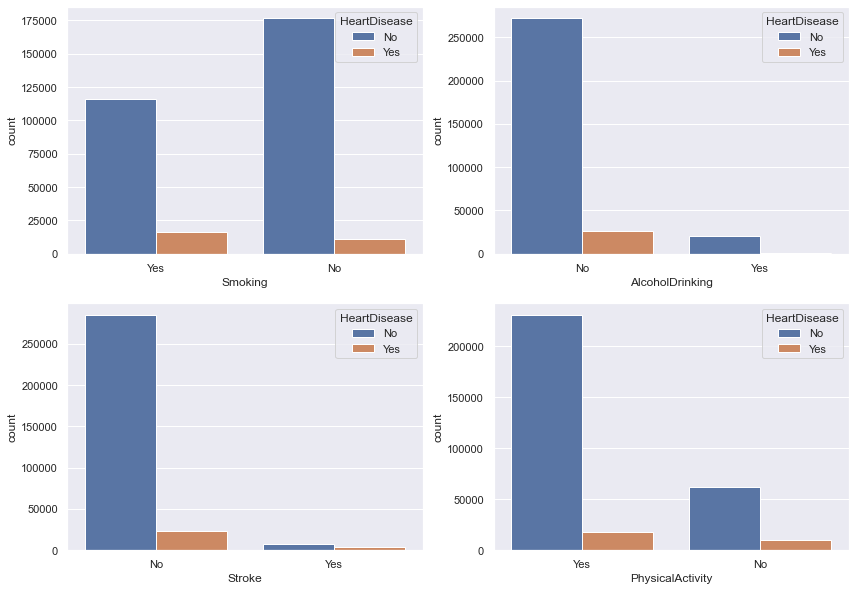

In [156]:
sns.set(rc={'figure.figsize':(14,10)})

fig, axes = plt.subplots(2, 2)

# plt.figure(figsize = (20,20))

sns.countplot(x = 'Smoking', hue = 'HeartDisease', data = patient_data, ax=axes[0,0])
sns.countplot(x = 'AlcoholDrinking', hue = 'HeartDisease', data = patient_data, ax=axes[0,1])
sns.countplot(x = 'Stroke', hue = 'HeartDisease', data = patient_data, ax=axes[1,0])
sns.countplot(x = 'PhysicalActivity', hue = 'HeartDisease', data = patient_data, ax=axes[1,1])

In [157]:
Different_Walking = patient_data.DiffWalking.value_counts()
sex = patient_data.Sex.value_counts()
age = patient_data.AgeCategory.value_counts()
race = patient_data.Race.value_counts()

fig = make_subplots(rows = 2, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
             values = Different_Walking.values,
             labels = Different_Walking.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people have Different Waliking symptons'), row = 1, col = 1)

fig.add_trace(go.Pie(
             values = sex.values,
             labels = sex.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Gender'), row = 1, col = 2)

fig.add_trace(go.Pie(
             values = age.values,
             labels = age.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Age Categorically'), row = 2, col = 1)

fig.add_trace(go.Pie(
             values = race.values,
             labels = race.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Race of people'), row = 2, col = 2)



fig.update_traces(titleposition = 'bottom center',textposition = 'inside', 
                  textinfo = 'percent+label',marker_colors=px.colors.qualitative.Prism, 
                  marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(margin=dict(t=5, b=5, l=5, r=5))
fig.show()


<AxesSubplot:xlabel='Sex', ylabel='count'>

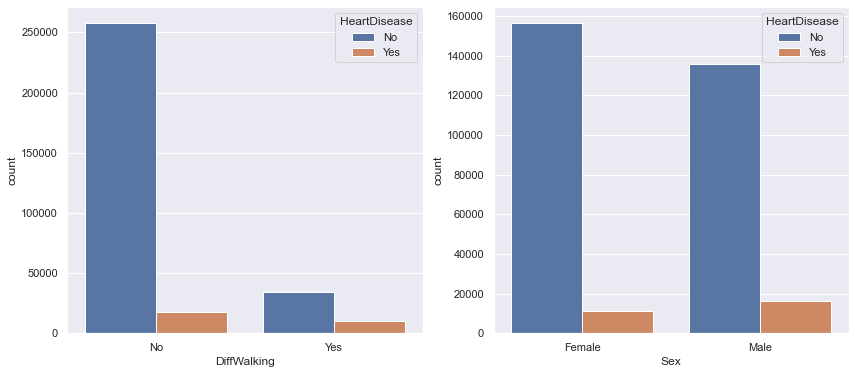

In [158]:
sns.set(rc={'figure.figsize':(14,6)})

fig, axes = plt.subplots(1, 2)

# plt.figure(figsize = (20,20))

sns.countplot(x = 'DiffWalking', hue = 'HeartDisease', data = patient_data, ax=axes[0])
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = patient_data, ax=axes[1])

# sns.countplot(x = 'Race', hue = 'HeartDisease', data = patient_data, ax=axes[1,1])

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

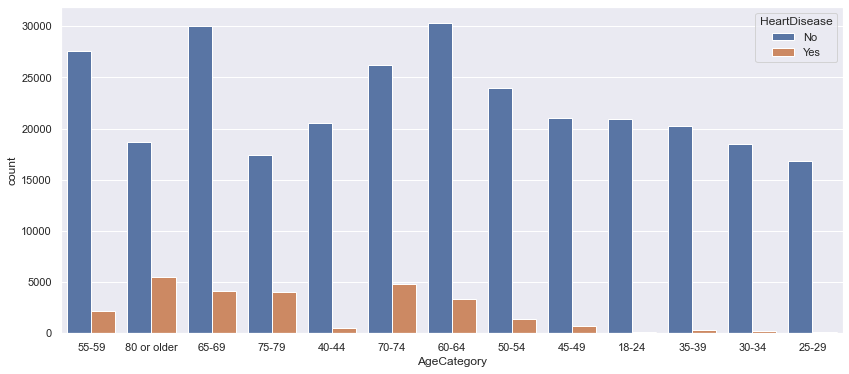

In [159]:
sns.countplot(x = 'AgeCategory', hue = 'HeartDisease', data = patient_data)

In [160]:
diabetic = patient_data.Diabetic.value_counts()
asthma = patient_data.Asthma.value_counts()
kidneyDisease = patient_data.KidneyDisease.value_counts()
skinCancer = patient_data.SkinCancer.value_counts()

fig = make_subplots(rows = 2, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
             values = diabetic.values,
             labels = diabetic.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people have Diabetes'), row = 1, col = 1)

fig.add_trace(go.Pie(
             values = asthma.values,
             labels = asthma.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people have Asthma'), row = 1, col = 2)

fig.add_trace(go.Pie(
             values = kidneyDisease.values,
             labels = kidneyDisease.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people have Kidney Diseases'), row = 2, col = 1)

fig.add_trace(go.Pie(
             values = skinCancer.values,
             labels = skinCancer.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'Percent of people have Skin Cancer'), row = 2, col = 2)



fig.update_traces(titleposition = 'bottom center',textposition = 'inside', 
                  textinfo = 'percent+label',marker_colors=px.colors.qualitative.Prism, 
                  marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(margin=dict(t=5, b=5, l=5, r=5))
fig.show()


<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

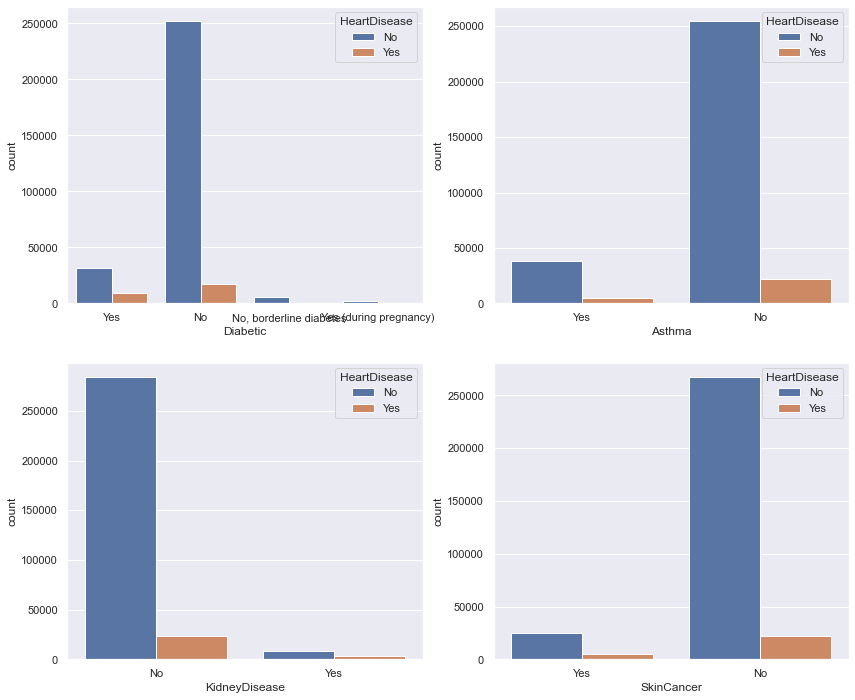

In [161]:
sns.set(rc={'figure.figsize':(14,12)})

fig, axes = plt.subplots(2, 2)

# plt.figure(figsize = (20,20))

sns.countplot(x = 'Diabetic', hue = 'HeartDisease', data = patient_data, ax=axes[0,0])
sns.countplot(x = 'Asthma', hue = 'HeartDisease', data = patient_data, ax=axes[0,1])
sns.countplot(x = 'KidneyDisease', hue = 'HeartDisease', data = patient_data, ax=axes[1,0])
sns.countplot(x = 'SkinCancer', hue = 'HeartDisease', data = patient_data, ax=axes[1,1])

In [162]:
sleepTime = patient_data.SleepTime.value_counts()
generalHealth = patient_data.GenHealth.value_counts()


fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
             values = sleepTime.values,
             labels = sleepTime.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'People Sleep Time'), row = 1, col = 1)

fig.add_trace(go.Pie(
             values = generalHealth.values,
             labels = generalHealth.index,
#              color_discrete_sequence = px.colors.sequential.Viridis,
            title = 'General Health'), row = 1, col = 2)



fig.update_traces(titleposition = 'bottom center',textposition = 'inside', 
                  textinfo = 'percent+label',marker_colors=px.colors.qualitative.Prism, 
                  marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(margin=dict(t=5, b=5, l=5, r=5))
fig.show()


In [163]:
train_data = patient_data
# train_data.head(2)

In [164]:
# heartDis.head(2)

In [165]:
dum_data = pd.get_dummies(patient_data[['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke', 
                                        'DiffWalking', 'Sex', 'Race', 'Diabetic', 'AgeCategory', 
                                        'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']], drop_first = True)
dum_data.head(3)

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [166]:
train_data = pd.concat([train_data, dum_data], axis = 1)
train_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,1,0,0,0,1,1,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,1,1,0,0,0,1,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,0,1,1,0,0,0,1,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,1,0,0,0,1,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,0,1,0,0,0,1,0,0,0


In [167]:
train_data.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke', 
                            'DiffWalking', 'Sex', 'Race', 'Diabetic', 'AgeCategory', 
                            'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis = 1, inplace = True)
train_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [170]:
train_scaled_data = train_data

train_scaled_data['BMI'] = train_scaled_data['BMI']/max(train_scaled_data['BMI'])
train_scaled_data['PhysicalHealth'] = train_scaled_data['PhysicalHealth']/max(train_scaled_data['PhysicalHealth'])
train_scaled_data['MentalHealth'] = train_scaled_data['MentalHealth']/max(train_scaled_data['MentalHealth'])
train_scaled_data['SleepTime'] = train_scaled_data['SleepTime']/max(train_scaled_data['SleepTime'])

train_scaled_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,AgeCategory_75-79,AgeCategory_80 or older,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.175013,0.100000,1.0,0.208333,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0.214444,0.000000,0.0,0.291667,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0.280232,0.666667,1.0,0.333333,0,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,0.255245,0.000000,0.0,0.250000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.249974,0.933333,0.0,0.333333,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


## Lets Train Data

In [175]:
from sklearn.model_selection import train_test_split

In [182]:
X = train_scaled_data.drop('HeartDisease_Yes', axis = 1)
y = train_scaled_data['HeartDisease_Yes']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [186]:
prediction = logreg.predict(X_test)

In [187]:
from sklearn.metrics import classification_report

In [188]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.96     87796\n           1       0.54      0.11      0.18      8143\n\n    accuracy                           0.92     95939\n   macro avg       0.73      0.55      0.57     95939\nweighted avg       0.89      0.92      0.89     95939\n'

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(y_test, prediction)

array([[87038,   758],
       [ 7245,   898]], dtype=int64)

In [191]:
from sklearn.metrics import accuracy_score

In [193]:
accuracy_score(y_test, prediction)*100

91.65824117407936